In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

np.random.seed(42)
tensorflow.random.set_seed(42)

2024-06-26 12:45:55.489968: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-26 12:45:55.490090: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-26 12:45:55.622888: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# **Loading the mnist dataset**

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
print(X_train)
print(X_train.shape)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
(60000, 28, 28)


**It is a 3d array having 60000 images where each image is 28x28 (784 pexels) size**

In [4]:
# 1st image with shape 28x28
print(X_train[0])
print(X_train[0].shape)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

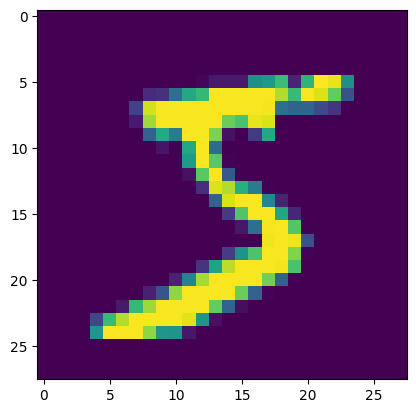

In [5]:
plt.imshow(X_train[0])

# **Normalizing**

In [6]:
X_train = X_train/255
X_test = X_test/255

# **Model Creation**

In [7]:
model = Sequential()
model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(X_train, y_train, batch_size = 32, epochs=20, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/20
 111/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6548 - loss: 1.2513

I0000 00:00:1719405980.050867      83 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8748 - loss: 0.4569 - val_accuracy: 0.9575 - val_loss: 0.1511
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9595 - loss: 0.1359 - val_accuracy: 0.9661 - val_loss: 0.1145
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9734 - loss: 0.0894 - val_accuracy: 0.9704 - val_loss: 0.1006
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9818 - loss: 0.0636 - val_accuracy: 0.9726 - val_loss: 0.0922
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9868 - loss: 0.0471 - val_accuracy: 0.9743 - val_loss: 0.0882
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9905 - loss: 0.0353 - val_accuracy: 0.9758 - val_loss: 0.0871
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9937 - loss: 0.0263 - val_accuracy: 0.9742 - val_loss: 0.0921
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9961 - loss: 0.0197 - val_accurac

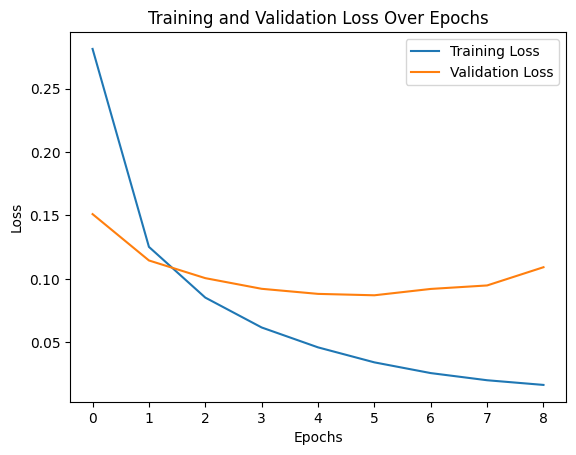

In [10]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

# Add title and labels
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Add legend
plt.legend()

# Show plot
plt.show()

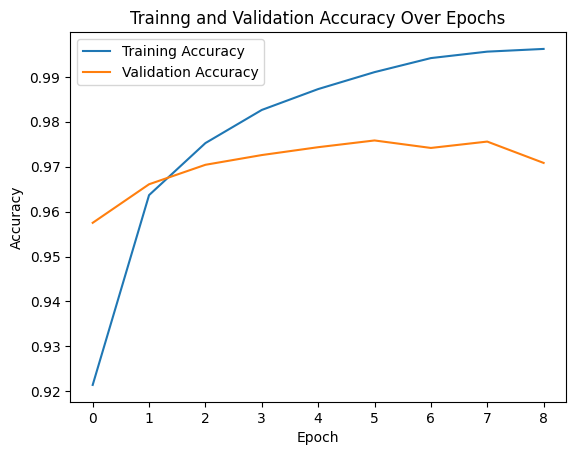

In [11]:
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')

plt.title('Trainng and Validation Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.legend()
plt.show()

In [12]:
y_pred_prob = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [13]:
y_pred = y_pred_prob.argmax(axis = 1)

In [14]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9747

# **Lets predict another image**

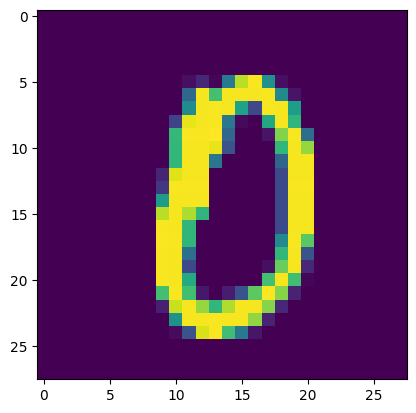

In [16]:
plt.imshow(X_test[55])

# **Lets learn about the Shapes too!**
Imagine your model is trained on images of handwritten digits from the MNIST dataset. Each image is of shape (28, 28) because they are grayscale images of size 28x28 pixels.

When you are training the model, you provide a batch of images, not just one. For example, if you have a batch size of 32, your input shape to the model would be (32, 28, 28).

However, when you want to make a prediction on a single image after the model is trained, you still need to include the batch size dimension, even if you are only passing one image. This is because the model expects inputs in the same shape it was trained on, which includes the batch size dimension.

**Original Shape:**

The shape of X_test[55] is (28, 28).
If you pass this directly to model.predict(), the model will throw an error because it expects a batch of images, not a single image without a batch dimension.

**Reshaping:**

By reshaping X_test[55] to (1, 28, 28), you are effectively adding a batch dimension.
The new shape (1, 28, 28) means:
1: You have one image in the batch.
28: The height of the image.
28: The width of the image.

# **Channels Explained**
**Grayscale Images:**

A grayscale image has only one channel. Each pixel value represents the intensity of light, typically ranging from 0 (black) to 255 (white).
The shape of a grayscale image is usually represented as (height, width), but when working with models, it is often expressed with an additional channel dimension as (height, width, 1).

**Color Images (RGB):**

A color image has three channels: Red, Green, and Blue (RGB). Each pixel in an RGB image is represented by three values, corresponding to the intensity of the red, green, and blue components.
The shape of an RGB image is typically represented as (height, width, 3).
Example: Image Shapes with Channels

**Single Grayscale Image:**

Without the batch dimension: (28, 28)
With the batch dimension: (1, 28, 28)
With the explicit channel dimension: (28, 28, 1)
With both batch and channel dimensions: (1, 28, 28, 1)

**Single RGB Image:**

Without the batch dimension: (28, 28, 3)
With the batch dimension: (1, 28, 28, 3)

In [17]:
y_prob = model.predict(X_test[55].reshape(1, 28, 28))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


In [18]:
y_hat = y_prob.argmax(axis = 1)
y_hat

array([0])